Fold 1:
Training Error: 0.0
Test Error: 0.06000000000000005
Confusion Matrix:
[[17  0  0]
 [ 0 14  3]
 [ 0  0 16]]
Accuracy: 0.94
Precision: 0.9494736842105262
Recall: 0.94
F1 Score: 0.9396682027649769
Fold 2:
Training Error: 0.0
Test Error: 0.020000000000000018
Confusion Matrix:
[[17  0  0]
 [ 0 16  0]
 [ 0  1 16]]
Accuracy: 0.98
Precision: 0.9811764705882353
Recall: 0.98
F1 Score: 0.98
Fold 3:
Training Error: 0.0
Test Error: 0.040000000000000036
Confusion Matrix:
[[16  0  0]
 [ 0 15  2]
 [ 0  0 17]]
Accuracy: 0.96
Precision: 0.9642105263157894
Recall: 0.96
F1 Score: 0.9598611111111112


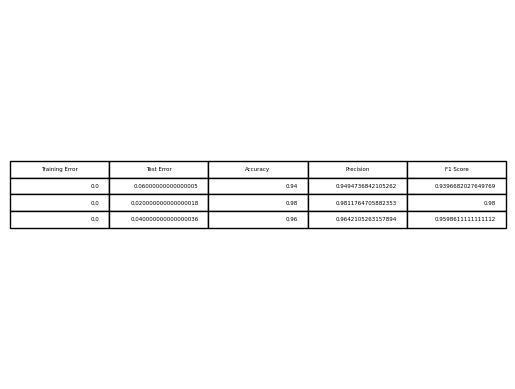

In [1]:
# F2020376027 MTQ
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
X, Y = iris.data, iris.target

# Perform PCA on the feature matrix
pca = PCA(n_components=2)  # Choose the number of components you want to keep
X = pca.fit_transform(X)

# Define the number of folds for cross-validation
num_folds = 3

# Create lists to store training and test errors for each fold
train_errors = []
test_errors = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform k-fold cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)
fold_no = 1
for train_index, test_index in skf.split(X, Y):
    print(f"Fold {fold_no}:")

    # Split data into train and test sets
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Initialize the decision tree classifier
    tree_model = DecisionTreeClassifier()

    # Train the model
    tree_model.fit(x_train, y_train)

    # Predict on training and test data
    y_train_pred = tree_model.predict(x_train)
    y_test_pred = tree_model.predict(x_test)

    # Calculate the training and test errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Store the errors and metrics for this fold
    train_errors.append(train_error)
    test_errors.append(test_error)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print the errors and metrics for this fold
    print(f"Training Error: {train_error}")
    print(f"Test Error: {test_error}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Increment the fold number
    fold_no += 1

# Create a table to display the training and test errors, and metrics for each fold
table = np.zeros((num_folds, 5))
for i in range(num_folds):
    table[i, 0] = train_errors[i]
    table[i, 1] = test_errors[i]
    table[i, 2] = accuracies[i]
    table[i, 3] = precisions[i]
    table[i, 4] = f1_scores[i]

# Plot the table
fig,ax = plt.subplots()
ax.axis('off')
ax.table(cellText=table, colLabels=['Training Error', 'Test Error', 'Accuracy', 'Precision', 'F1 Score'], loc='center')

plt.show()
